두 과제 모두 진행하셔야 합니다.

# 과제 1.

딥러닝 이론 세션에서 배운 다음 용어중 5개를 골라  
이에 대하여 간단하게 용어 정리를 해주세요.  

- 활성화 함수 (Activation function)
- 손실 함수 (Loss function)
- 경사 하강법 (Gradient descent)
- 학습률 (Learning rate)
- 에포크 (Epoch)
- 오차역전파 (Backpropagation)
- Local gradient
- Global gradient
- Gradient vanishing
- Optimizer

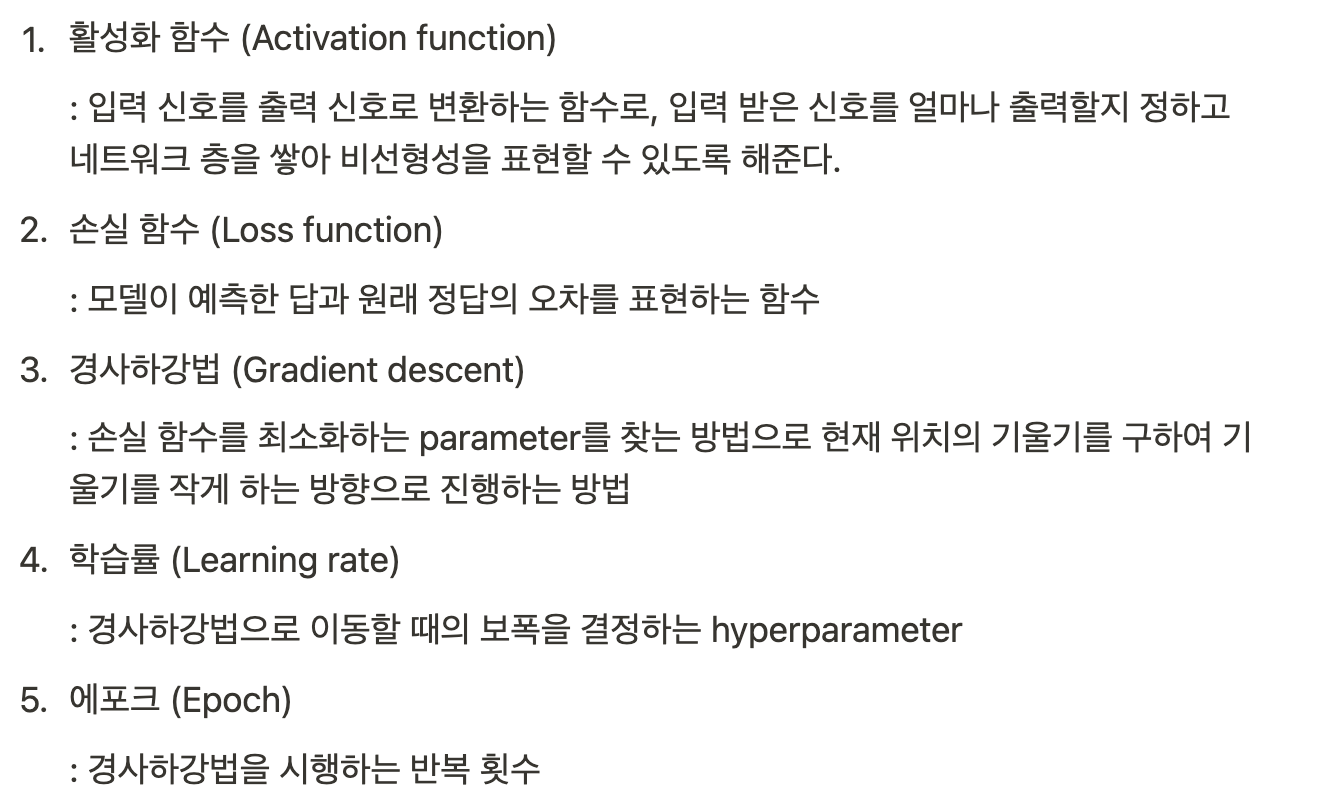

# 과제 2. Fashion MNIST 분류 딥러닝 구축

## Fashion MNIST 소개 및 개요


Fashon MNIST 데이터셋은 옷, 신발 등의 의류 이미지를  
0~9 의 클래스로 분류한 데이터입니다.  
하단 코드는 데이터에 대해 살펴보는 코드인데,  
데이터가 어떤 식으로 구성되어있는지 참고만 하시면 됩니다.

In [4]:
# torchvision은 이미지 처리 등 비전 태스크를 위한 torch 모듈입니다.
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 이미지를 텐서로 변경
transform = transforms.Compose([
    transforms.ToTensor()
])

In [6]:
# 데이터셋 자동 다운로드
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [7]:
# 여기 있는 DataLoader는 단순히 EDA를 위해 생성한 것입니다.
batch_size = 16

train_loader = DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [8]:
# 반복문에서 사용할 수 있도록 iter()함수 적용
dataiter = iter(train_loader)
# next()함수로 다음 배치 1개 갖고오기
images, labels = next(dataiter)

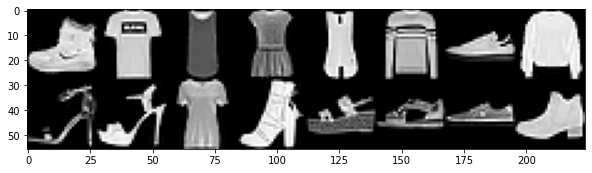

In [9]:
# 데이터 체크
# utils.make_grid : 여러 이미지를 하나로 묶어보기 위함
img = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [10]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [11]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


(28, 28)


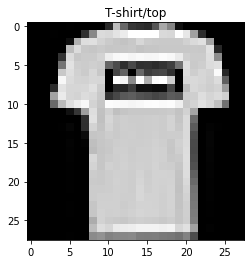

In [12]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

## 과제 진행 부분

여기서부터는 위의 Fashion MNIST 데이터셋을 활용해  
이들을 분류하는 신경망 모델을 구축합니다.  

주석 란에  
`########## 과제 내용 ############`  
해당 주석이 있는 부분에만 코드를 작성하시면 됩니다.  


### 기본 모듈 임포트

In [13]:
from torchvision import transforms, datasets

In [14]:
############# 모듈 임포트 ##############
# 기본 텐서 연산을 위한 모듈과,
# 신경망 구축, 옵티마이저 관련 모듈을 불러옵니다. (총 3개)
import torch
import torch.nn as nn
import torch.optim as optim

### 데이터셋과 DataLoader 생성

입력 `x` 는 `[배치크기, 색, 높이, 넓이]`로 이루어져 있습니다.  
Fashion MNIST에서 이미지의 크기는 28 x 28, 색은 흑백으로 1 가지 입니다.  
그러므로 입력 x의 총 특성값 갯수는 28 x 28 x 1, 즉 784개 입니다. 

In [15]:
# 이미지를 텐서로 변경
transform = transforms.Compose([
    transforms.ToTensor()
])

In [16]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [26]:
trainset[0][0].shape

torch.Size([1, 28, 28])

In [17]:
############# 모듈 임포트 ##############
# DataLoader 클래스를 사용하기 위한 모듈을 임포트하세요.
from torch.utils.data import DataLoader

In [18]:
BATCH_SIZE = 512

In [19]:
######## DataLoader 생성 ##########
# train set과 test set 각각에 대하여 DataLoader를 생성합니다.
# shuffle=True 매개변수를 넣어 데이터를 섞어주세요.
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

### 신경망 모델 구축

신경망 클래스 이름은 Net으로 하여 3개의 레이어를 가진 모델을 만드세요.  
노드의 개수와 활성화 함수는 자유입니다.  
출력층 노드의 개수는 10개입니다.  
또한, 출력층에 Softmax 함수를 적용할 필요가 없습니다.

(hint. forward시 첫 번째 레이어를 통과하기 전에 784차원의 텐서로 차원을 변환 해야합니다.)

In [61]:
############### Net 신경망 생성 ##############
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(784, 10)
        self.layer2 = nn.Linear(10, 20)
        self.layer3 = nn.Linear(20, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.tensor(x).reshape(-1,1,784)
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)

        return out

In [62]:
model = Net()

In [63]:
model

Net(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (relu): ReLU()
)

### 학습하기

In [64]:
EPOCHS = 30

In [65]:
######### 손실 함수 및 옵티마이저 설정 ############
# 손실 함수는 nn 모듈의 CrossEntropyLoss 함수를 사용합니다.
# 옵티마이저는 SGD로, 학습률은 0.01로 지정하세요.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

모델 학습 과정의 함수를 작성합니다.  
주석으로 지시하는 부분의 코드를 작성해주세요.

In [100]:
def train(model, train_loader, optimizer):
    model.train()

    ######## 배치 당 loss 값을 담을 리스트 생성 #########
    batch_losses = []

    for data, target in train_loader:
        ######### 옵티마이저의 기울기 초기화 ############
        optimizer.zero_grad()

        ######### 모델에서 예측값 산출 ############
        output = model.forward(data)
        # print(output.shape)


        ######### loss 계산 ############
        # 정답 데이터와의 Cross Entropy Loss 계산
        # 그리고 이 loss를 배치 당 loss로 보관합니다.
        loss = criterion(output.squeeze(), target)
        batch_losses.append(loss)
        


        ######### 기울기 계산 ########
        loss.backward()

        ######## 가중치 갱신 ########
        optimizer.step()
    
    ######## 배치 당 평균 loss 계산 ############
    avg_loss = sum(batch_losses) / len(batch_losses)
    
    return avg_loss

모델을 테스트하는 과정의 함수도 생성합니다.  
주석으로 지시하는 부분의 코드를 작성해주세요.  

In [106]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()

    ######## 배치 당 loss 값을 담을 리스트 생성 #########
    batch_losses = []

    # 실제 모델의 예측이 정답과 맞은 횟수 = correct
    correct = 0

    ####### 평가 과정에서는 기울기를 계산하지 않습니다. #########
    ####### 해당하는 코드를 작성해주세요. ############
    with torch.no_grad():
        for data, target in test_loader:
            # 예측값 생성
            output = model(data)

            ######### loss 계산 ############
            # 정답 데이터와의 Cross Entropy Loss 계산
            # 그리고 이 loss를 배치 당 loss로 보관합니다.
            loss = criterion(output.squeeze(), target)
            batch_losses.append(loss)
            
            
            # Accuracy 계산
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측 클래스(pred)과 정답 클래스를 비교하여 일치할 경우 correct에 1을 더합니다.
            # pred = output.max(1, keepdim=True)[1]
            pred = torch.argmax(output, dim=-1)
            # print(pred.shape)

            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    ######## 배치 당 평균 loss 계산 ############
    avg_loss = sum(batch_losses) / len(batch_losses)

    #정확도 계산
    accuracy = 100. * correct / len(test_loader.dataset)

    return avg_loss, accuracy

코드를 실행시켜 학습을 진행합니다.  
다소 시간이 걸릴 수 있습니다.

In [107]:
for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


[1] Train Loss: 1.6069	Test Loss: 1.4777	Accuracy: 52.46%
[2] Train Loss: 1.3646	Test Loss: 1.2812	Accuracy: 57.26%
[3] Train Loss: 1.2002	Test Loss: 1.1482	Accuracy: 60.33%
[4] Train Loss: 1.0836	Test Loss: 1.0526	Accuracy: 63.04%
[5] Train Loss: 0.9960	Test Loss: 0.9766	Accuracy: 65.76%
[6] Train Loss: 0.9294	Test Loss: 0.9190	Accuracy: 67.45%
[7] Train Loss: 0.8765	Test Loss: 0.8722	Accuracy: 69.24%
[8] Train Loss: 0.8325	Test Loss: 0.8413	Accuracy: 69.84%
[9] Train Loss: 0.7976	Test Loss: 0.8030	Accuracy: 71.85%
[10] Train Loss: 0.7689	Test Loss: 0.7753	Accuracy: 72.39%
[11] Train Loss: 0.7428	Test Loss: 0.7530	Accuracy: 73.40%
[12] Train Loss: 0.7196	Test Loss: 0.7333	Accuracy: 73.43%
[13] Train Loss: 0.7010	Test Loss: 0.7173	Accuracy: 74.69%
[14] Train Loss: 0.6842	Test Loss: 0.7020	Accuracy: 75.33%
[15] Train Loss: 0.6672	Test Loss: 0.6879	Accuracy: 75.26%
[16] Train Loss: 0.6524	Test Loss: 0.6678	Accuracy: 76.21%
[17] Train Loss: 0.6393	Test Loss: 0.6540	Accuracy: 77.04%
[18] T